In [ ]:
!wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O dataset

--2023-07-23 13:44:14--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-23 13:44:14--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e5c0271a960a99a3793d15007.dl.dropboxusercontent.com/zip_download_get/Bjwdi3w6jDse0SFJzJAhKu7iVYraPyj1kmMWHgfspxMnXyNlCx57roMOQqPuAFtw3dOEAryeeKODmrix0StJGFP2Pa7PRUOGMj0vfpRYam-mdQ# [following]
--2023-07-23 13:44:15--  https://uc3e5c0271a960a99a3793d15007.dl.dropboxusercontent.com/zip_download_get/Bjwdi3w6jDse0SFJzJAhKu7iVYraPyj1kmMWHgfspxMnXyNlCx57roMOQqPuAFtw3dOEAryeeKODmrix0StJGFP2Pa7PRUOGM

In [ ]:
!unzip dataset -d "images/"

Archive:  dataset
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/

In [ ]:
import os # operating system.

In [ ]:
classes = os.listdir("images/Train")
classes

['Pikachu', 'Bulbasaur', 'Charmander']

In [ ]:
len(os.listdir("images/Train/Pikachu"))

101

In [ ]:
len(os.listdir("images/Train/Bulbasaur"))

101

In [ ]:
len(os.listdir("images/Train/Charmander"))

102

In [ ]:
print("Train Data:")
for c in classes:
    print(c, len(os.listdir("images/Train/"+c)))

Train Data:
Pikachu 101
Bulbasaur 101
Charmander 102


In [ ]:
print("Train Data:")
for c in classes:
    print(c, len(os.listdir("images/Test/"+c)))

Train Data:
Pikachu 40
Bulbasaur 41
Charmander 42


# Data Loading

In [ ]:
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

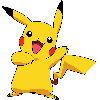

In [ ]:
img = utils.load_img("images/Train/Pikachu/297.jpg", target_size=(100,100))
img

In [ ]:
img = np.array(img)
img.shape

(100, 100, 3)

In [ ]:
train_data = [] # X
train_labels = [] # Y


for category in classes:

    folder = "images/Train/" + category
    for img_name in os.listdir(folder):
        img_path = folder +"/"+img_name

        img = utils.load_img(img_path, target_size=(100,100))
        img = np.array(img)

        train_data.append(img)
        train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
X_train = np.array(train_data)
Y_train = np.array(train_labels)

In [ ]:
X_train.shape

(304, 100, 100, 3)

In [ ]:
Y_train.shape

(304,)

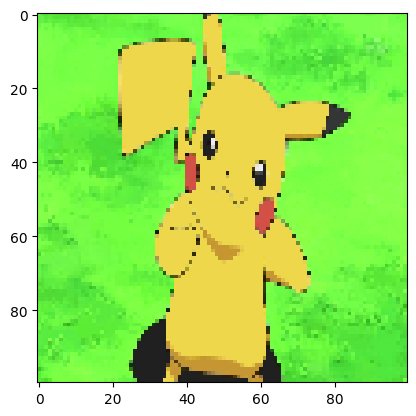

In [ ]:
plt.imshow(X_train[20])

In [ ]:
Y_train[20]

'Pikachu'

In [ ]:
# Y_train

In [ ]:
 category2label = {"Pikachu" : 0, "Bulbasaur" : 1, "Charmander" : 2}
 label2category = {0: "Pikachu", 1: "Bulbasaur", 2: "Charmander"}

In [ ]:
Y_train = np.array([category2label[label] for label in Y_train])

In [ ]:
Y_train[:5]

array([0, 0, 0, 0, 0])

In [ ]:
Y_train.shape

(304,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train_new = to_categorical(Y_train)
Y_train_new.shape

(304, 3)

In [ ]:
Y_train_new[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
Y_train_new[-5:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras import Sequential # we want to create sequential model.
from tensorflow.keras.layers import Dense # fully connected layer
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()


model.add(Convolution2D(32, (3,3), activation='relu', input_shape =(100, 100 ,3) ))
model.add(Convolution2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Convolution2D(128, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 67712)             0

In [ ]:
model.fit(X_train, Y_train_new, batch_size=64, epochs=25)

Epoch 1/25
5/5 [==============================] - 13s 250ms/step - loss: 97.4828 - accuracy: 0.3750
Epoch 2/25
5/5 [==============================] - 0s 39ms/step - loss: 15.3438 - accuracy: 0.5789
Epoch 3/25
5/5 [==============================] - 0s 39ms/step - loss: 2.6799 - accuracy: 0.7204
Epoch 4/25
5/5 [==============================] - 0s 40ms/step - loss: 0.7404 - accuracy: 0.8421
Epoch 5/25
5/5 [==============================] - 0s 39ms/step - loss: 0.3624 - accuracy: 0.8816
Epoch 6/25
5/5 [==============================] - 0s 40ms/step - loss: 0.2246 - accuracy: 0.9211
Epoch 7/25
5/5 [==============================] - 0s 39ms/step - loss: 0.0752 - accuracy: 0.9737
Epoch 8/25
5/5 [==============================] - 0s 39ms/step - loss: 0.0738 - accuracy: 0.9770
Epoch 9/25
5/5 [==============================] - 0s 39ms/step - loss: 0.0345 - accuracy: 0.9901
Epoch 10/25
5/5 [==============================] - 0s 39ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 11/25
5/5 [========

# Test Data

In [ ]:
test_data = [] # X
test_labels = [] # Y


for category in classes:

    folder = "images/Test/" + category
    for img_name in os.listdir(folder):
        img_path = folder +"/"+img_name

        img = utils.load_img(img_path, target_size=(100,100))
        img = np.array(img)

        test_data.append(img)
        test_labels.append(category)

In [ ]:
X_test = np.array(test_data)
Y_test = np.array(test_labels)

In [ ]:
X_test.shape

(123, 100, 100, 3)

In [ ]:
Y_test.shape

(123,)

In [ ]:
Y_test = np.array([category2label[label] for label in Y_test])

In [ ]:
Y_test_new = to_categorical(Y_test)
Y_test_new.shape

(123, 3)

In [ ]:
model.evaluate(X_test, Y_test_new)

4/4 [==============================] - 1s 82ms/step - loss: 0.1415 - accuracy: 0.9675


[0.14151500165462494, 0.9674796462059021]

In [ ]:
123*0.97

119.31

In [ ]:
Y_pred = model.predict(X_test).argmax(axis=1)

4/4 [==============================] - 0s 8ms/step


In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Prediction for 1 image

In [ ]:
test_img = "images/Test/Charmander/2201.jpg"

img = utils.load_img(test_img, target_size=(100,100))
img = np.array(img)
img.shape

(100, 100, 3)

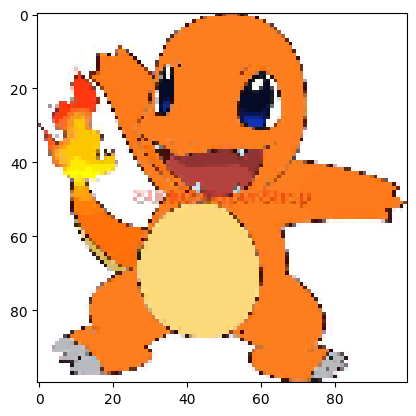

In [ ]:
plt.imshow(img)

In [ ]:
label2category[model.predict(img.reshape(1, 100, 100, 3)).argmax()]

1/1 [==============================] - 0s 20ms/step


'Charmander'